In [ ]:
# Se realizan los  graficos de barra, teniendo en cuenta el total de las 12 columnas contenidas en el archivo final de cleaning
# Se realiza la importacion de las librerias correspondientes para la ejecucion de los graficos en python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
import os

In [47]:
# Se carga el archivo csv "Colombianos_registrados_en_el_exterior"
data_cleaning = pd.read_csv("C:/Users/LILI/Desktop/GRAFICOS/Colombianos_registrados_en_el_exterior.csv", header=0)

In [48]:
# Se valida la cantidad de filas y columnas contenidad en el archivo 
data_cleaning.shape

(1593616, 12)

In [49]:
# Se evalua los 5 primeros  y los 5 ultimos datos de la columna "PAIS"
data_cleaning.País.value_counts().sort_index()

País
AFGANISTAN         8
ALBANIA           15
ALEMANIA       13849
ANDORRA          442
ANGOLA            28
               ...  
VENEZUELA     202674
VIET NAM         184
VIETNAM           14
YEMEN              3
ZAMBIA             1
Name: count, Length: 194, dtype: int64

In [50]:
#Debido al gran numero de paises que contiene el archivo, se toma el top 10 de los paises con mas colombianos registrados en el exterior, esto para ue la grafica sea mas comprensible 
top_10_paises = data_cleaning["País"].value_counts().nlargest(10)
print("Top 10 paises con mas colombianos registrados:")
for categoria, cantidad in top_10_paises.items():
    print(f"{categoria}: {cantidad}")

Top 10 paises con mas colombianos registrados:
ESTADOS UNIDOS: 479719
ESPAÑA: 402624
VENEZUELA: 202674
ECUADOR: 84593
CANADA: 52461
CHILE: 46565
ARGENTINA: 32567
PANAMA: 29132
BRASIL: 25148
MEXICO: 24563


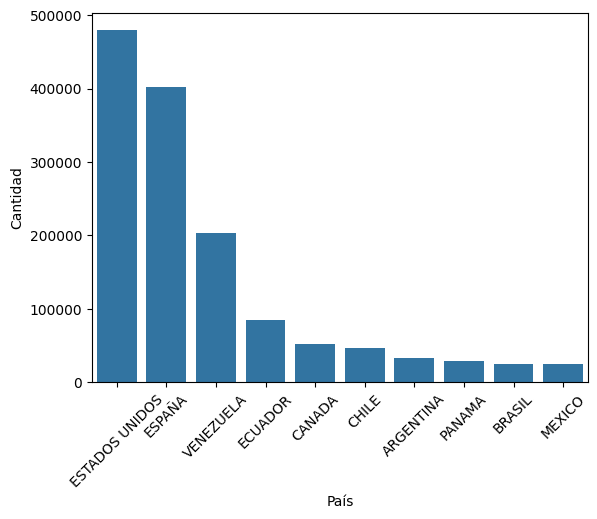

In [ ]:
# De acuerdo a los valores registrados en el codigo que antecede, se realiza la grafica  de barras, identificando los 10 paises con mas colombianos registrados, 
# siendo EE.UU el pais mas apetecido por los colombiados, seguido de España
top_10 = data_cleaning["País"].value_counts().nlargest(10).index
filtered_data = data_cleaning[data_cleaning["País"].isin(top_10)]
sns.countplot(data=filtered_data, x="País", order=top_10)
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

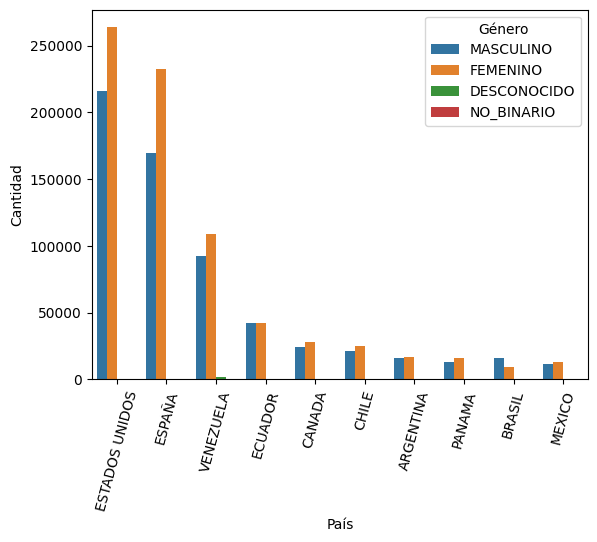

In [52]:
# se realiza filtros en el grafico de "PAIS", para identificar  cual es el genero que emigra mas hacia otros paises 
top_10 = data_cleaning["País"].value_counts().nlargest(10).index
filtered_data = data_cleaning[
    (data_cleaning["País"].isin(top_10)) &
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="País", order=top_10, hue="Género")  # "hue" separa por género
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.show()

In [53]:
# Se evalua los 5 primeros  y los 5 ultimos datos de la columna "Ciudad de Residencia"
data_cleaning.Ciudad_de_Residencia.value_counts().sort_index()

Ciudad_de_Residencia
/BRISTOL                11
/COVENTRY                1
/EPSOM                   1
/GUILDFORD               1
/HACKNEY                 2
                      ... 
ZURICH/ZOLLIKERBERG      9
ZURICH/ZOLLIKON          6
ZURICH/ZUMIKON           3
ZURICH/ZURICH          684
ZURICH/ZURICHHORN        2
Name: count, Length: 38983, dtype: int64

In [54]:
# De acuerdo al analisis realizado, se determina el top 10 de las ciudades con mas colombianos registrados
top_10_ciudades = data_cleaning["Ciudad_de_Residencia"].value_counts().nlargest(10)
print("Top 10 ciudades con mas colombianos registrados:")
for categoria, cantidad in top_10_ciudades.items():
    print(f"{categoria}: {cantidad}")

Top 10 ciudades con mas colombianos registrados:
MADRID/MADRID: 63245
ZULIA/MARACAIBO: 36660
PICHINCHA/QUITO: 23532
DISTRITO CAPITAL/CARACAS: 22972
FLORIDA/MIAMI: 22959
BARCELONA: 20957
PANAMA/PANAMA: 17997
COMUNIDAD VALENCIANA/VALENCIA: 14964
FLORIDA/ORLANDO: 14567
TEXAS/HOUSTON: 14192


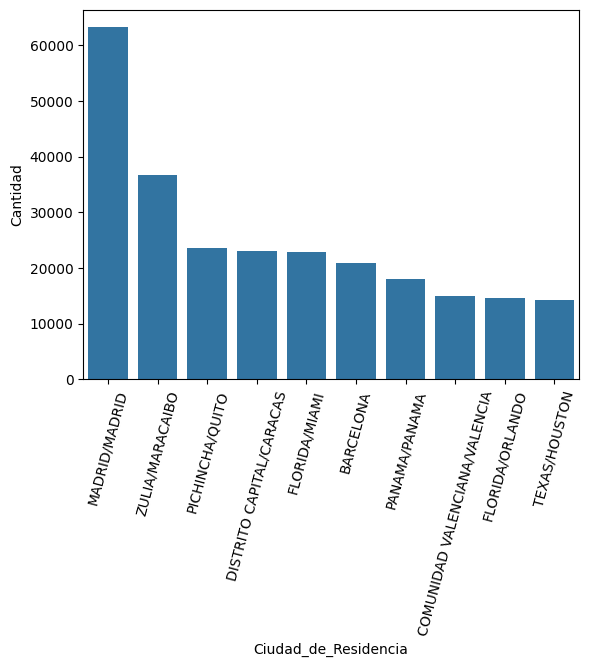

In [55]:
# Se realiza el grafico de barras identificando que  la ciudad con mas colombianos registrados en el exterior es "MADRID", la cual comprende uan totalidad de mas de 60.000 personas registradas 
top_10 = data_cleaning["Ciudad_de_Residencia"].value_counts().nlargest(10).index
filtered_data = data_cleaning[data_cleaning["Ciudad_de_Residencia"].isin(top_10)]
sns.countplot(data=filtered_data, x="Ciudad_de_Residencia", order=top_10)
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.show()

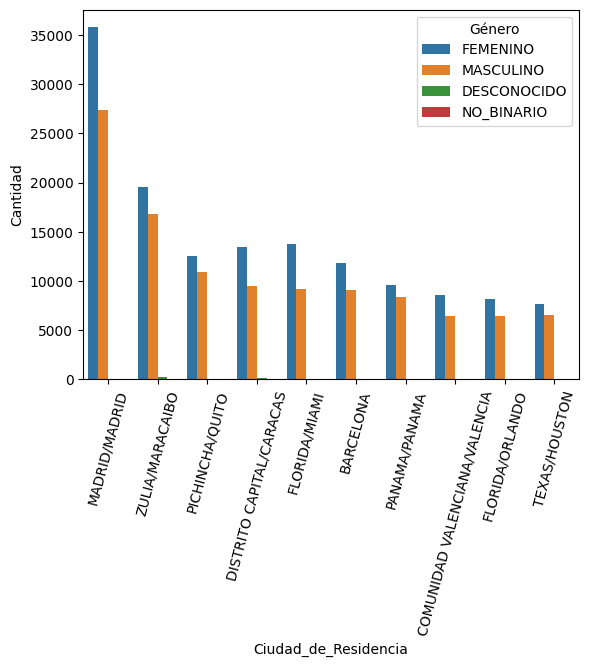

In [56]:
# se realiza filtros en el grafico de "Ciudad de Residencia", por genero,  identificiando que mas de 35.000 mil mujeres o sexo femenino residen en "MADRID" y 
top_10 = data_cleaning["Ciudad_de_Residencia"].value_counts().nlargest(10).index
filtered_data = data_cleaning[
    (data_cleaning["Ciudad_de_Residencia"].isin(top_10)) &
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Ciudad_de_Residencia", order=top_10, hue="Género")  # "hue" separa por género
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.show()

In [57]:
#Se evalua las edades de las personas que migran hacia otros paises
data_cleaning.Grupo_edad.value_counts().sort_index()

Grupo_edad
ADOLESCENTE           32397
ADULTO              1028311
ADULTO JOVEN         196953
ADULTO MAYOR         307137
DESCONOCIDO            2427
INFANTE               19792
PRIMERA INFANCIA       6599
Name: count, dtype: int64

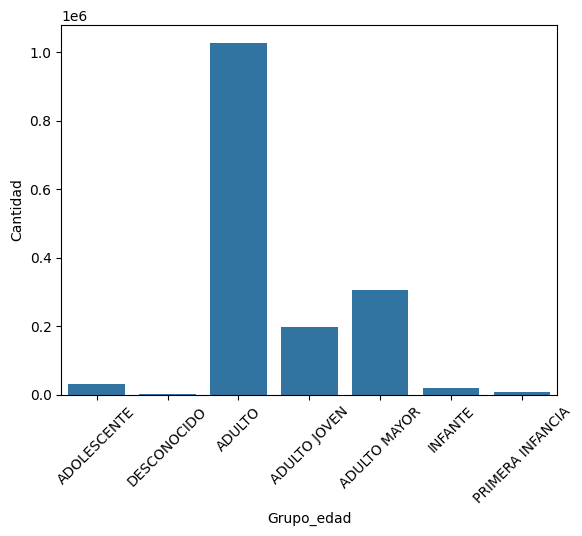

In [58]:
# se realiza el grafico de barras  por Grupo_ Edad y se identifica que las personas que migran hacia otros paises, se encuentran en la etapa de la adultez
sns.countplot(data=data_cleaning, x="Grupo_edad")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

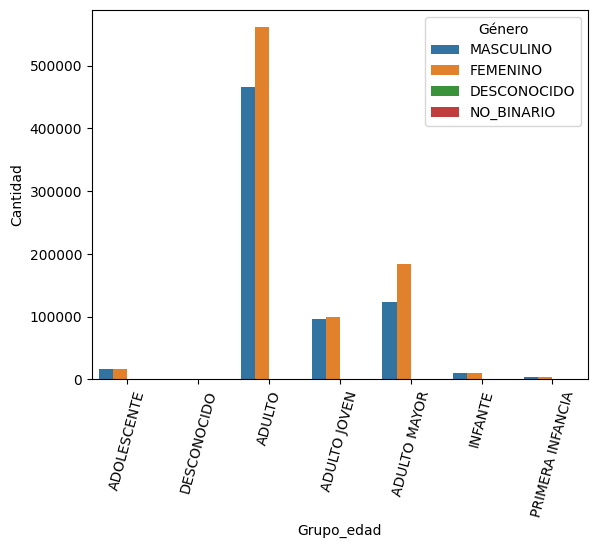

In [ ]:

# se realiza filtros en el grafico de "Grupo_Edad", para identificar  la etapa de la vida de las personas que emigran hacia otros paises y se determina que: 
#las mujeres que mas emigran hacia otros paises, se encuentra en etapa de la adultez
data_cleaning["Grupo_edad"].value_counts().index
filtered_data = data_cleaning[
        (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))]

sns.countplot(data=filtered_data, x="Grupo_edad", hue="Género")  # "hue" separa por género
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.show()


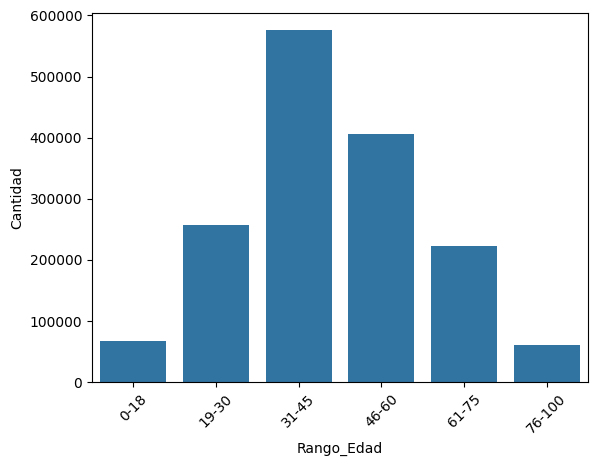

In [ ]:
#SeCrean rangos entre las edades, para poder identificar el rango de edad en la que se encuentan  las personas que emigran a otros paises
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ["0-18", "19-30", "31-45", "46-60", "61-75", "76-100"]
 
data_cleaning["Rango_Edad"] = pd.cut(data_cleaning["Edad"], bins=bins, labels=labels)
sns.countplot(data=data_cleaning, x="Rango_Edad", order=labels)
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

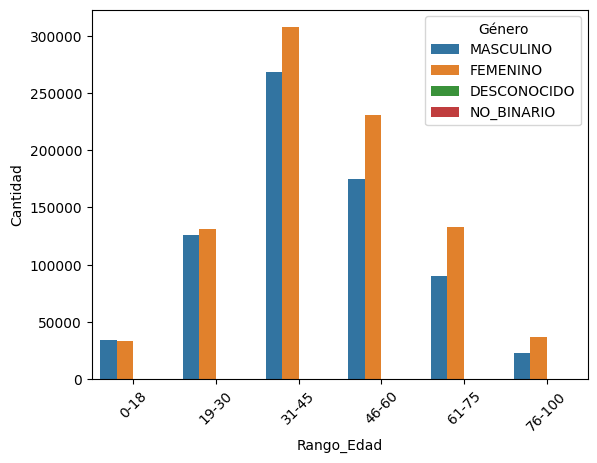

In [ ]:
# se realiza filtros en el grafico de "EDAD para identificar  cual es el rango de edad que tienen las personas al momento de emigrar hacia otros paises, logrando evidenciar que el rango de edad se encuentra entre 31-45 años y siendo el genero femenino el que lidera el rango de estas edades
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ["0-18", "19-30", "31-45", "46-60", "61-75", "76-100"]
 
data_cleaning["Rango_Edad"] = pd.cut(data_cleaning["Edad"], bins=bins, labels=labels)
filtered_data = data_cleaning[
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))]
 
sns.countplot(data=filtered_data, x="Rango_Edad", order=labels, hue="Género")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Se evalua las areas de conocimiento o areas de estudio que tienen los colombianos que emigran a otros paises
data_cleaning.Área_Conocimiento.value_counts().sort_index()

Área_Conocimiento
(NO REGISTRA)                                          731
ADMINISTRACION DE EMPRESAS Y DERECHO                  3089
AGRONOMIA, VETERINARIA Y AFINES                       5159
AGRONOMIA, VETERINARIA Y ZOOTECNIA                    3704
AGROPECUARIO, SILVICULTURA, PESCA, Y VETERINARIA       185
ARTES Y HUMANIDADES                                    607
AVIACION                                              2602
BELLAS ARTES                                         35655
CIENCIAS DE LA EDUCACION                             33822
CIENCIAS DE LA SALUD                                 83859
CIENCIAS NATURALES, MATEMATICAS Y ESTADISTICAS         324
CIENCIAS SOCIALES Y HUMANAS                          77144
CIENCIAS SOCIALES, PERIODISMO E INFORMACION           1055
COCINA Y CULINARIA                                    5108
ECONOMIA, ADMINISTRACION CONTADURIA Y AFINES        153127
EDUCACION                                              694
INGENIERIA, ARQUITECTURA Y AFINES     

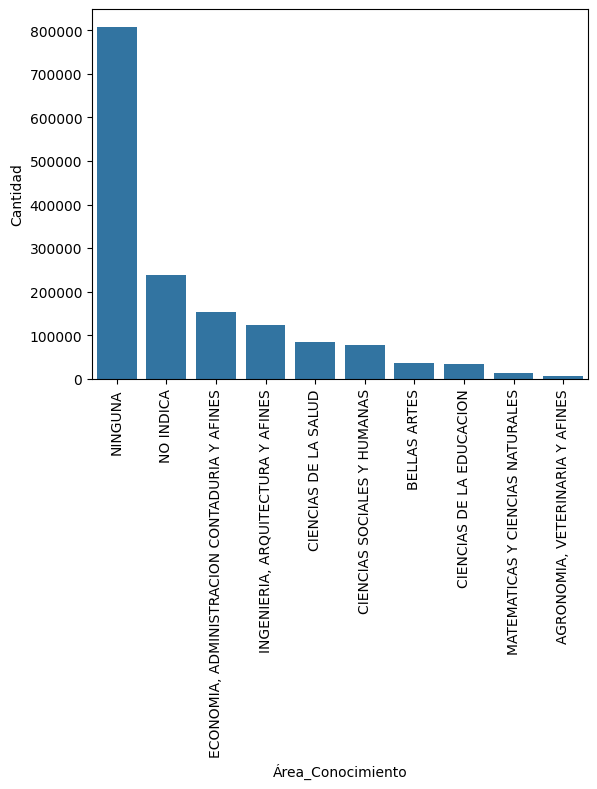

In [ ]:
# Se realiza el analisis de la grafica y se identifica que la mayoria de los colombianos que emigra hacia el exterior no poseen ningun tipo de estudio o ningun area de conocimiento
filtered_data = data_cleaning[data_cleaning["Área_Conocimiento"].isin(top_10)]
sns.countplot(data=filtered_data, x="Área_Conocimiento", order=top_10)
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

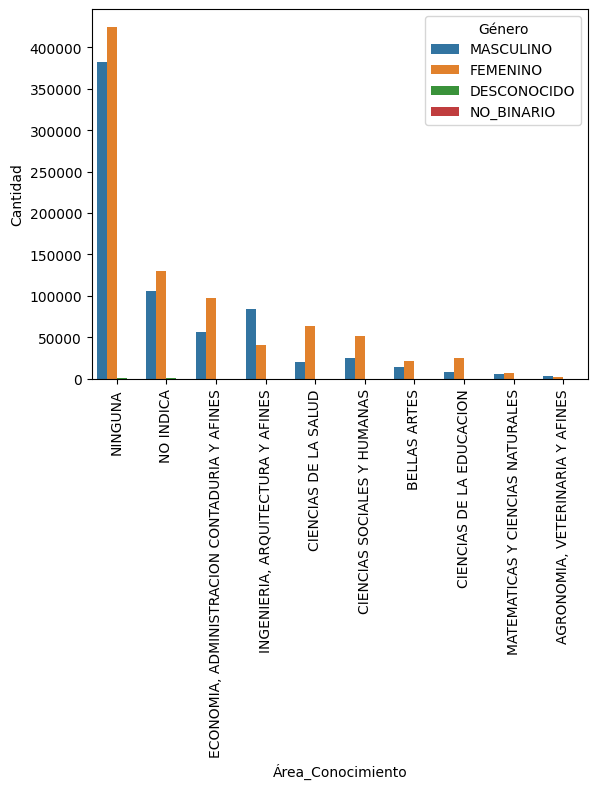

In [ ]:
#De acuerdo al filtro realizado por genero y Area de conocimiento, se determina que en su gran mayoria el genero femenino no cuenta o cuenta con alguna area de conocimiento

top_10 = data_cleaning["Área_Conocimiento"].value_counts().nlargest(10).index
filtered_data = data_cleaning[
    (data_cleaning["Área_Conocimiento"].isin(top_10)) &
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Área_Conocimiento", order=top_10, hue="Género")  # "hue" separa por género
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Se evalua las sub_areas de conocimiento y nuevamente se identifica que la gran mayoria de colombianos, no poseen sub_areas de conocimiento o no indican
top_10_area_de_conocimiento = data_cleaning["Sub_Area_Conocimiento"].value_counts().nlargest(10)
print("Top 10 ciudades con mas colombianos registrados:")
for categoria, cantidad in top_10_area_de_conocimiento.items():
    print(f"{categoria}: {cantidad}")

Top 10 ciudades con mas colombianos registrados:
NINGUNA: 808450
NO INDICA: 230030
ADMINISTRACION: 110455
EDUCACION: 34517
CONTADURIA PUBLICA: 26926
ENFERMERIA: 26158
INGENIERIA EN SISTEMAS, TELEMATICA Y AFINES: 25254
INGENIERIA INDUSTRIAL Y AFINES: 18930
DERECHO Y AFINES: 18782
ECONOMIA: 18646


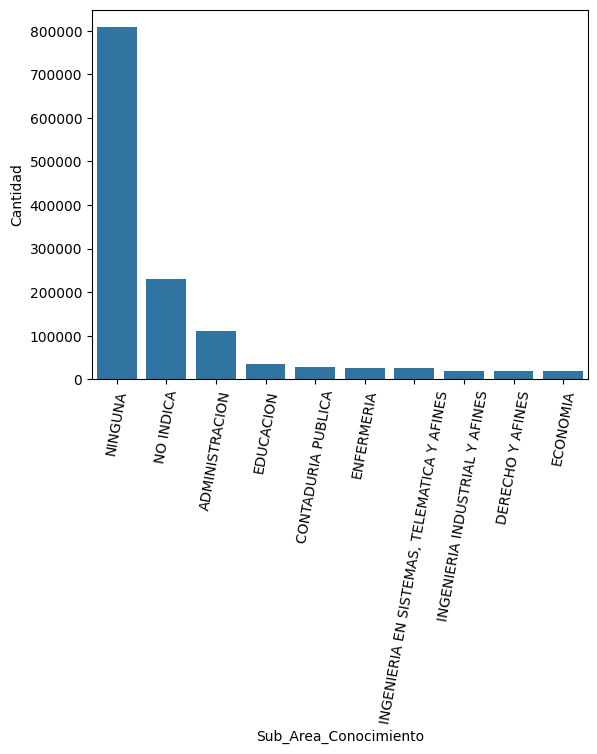

In [ ]:
#Se realiza el top 10 de las sub_areas de conocimientos que registran los colombianos que emigran hacian otros paises

top_10 = data_cleaning["Sub_Area_Conocimiento"].value_counts().nlargest(10).index
filtered_data = data_cleaning[data_cleaning["Sub_Area_Conocimiento"].isin(top_10)]
sns.countplot(data=filtered_data, x="Sub_Area_Conocimiento", order=top_10)
plt.xticks(rotation=80)
plt.ylabel("Cantidad")
plt.show()


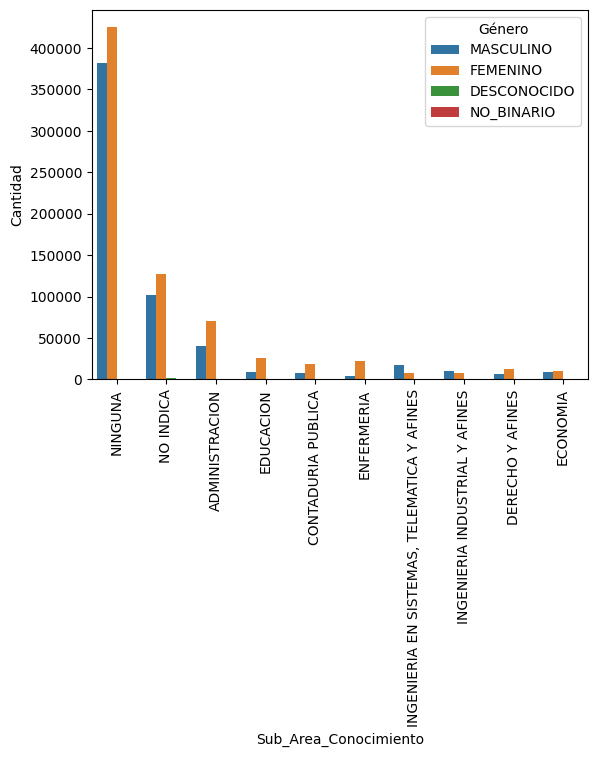

In [ ]:

# Se realiza la validacion por genero identificando que el genero femenino no posee en su mayoria un area de conocimiento o por lo menos no indica el area especializada
top_10 = data_cleaning["Sub_Area_Conocimiento"].value_counts().nlargest(10).index
filtered_data = data_cleaning[
    (data_cleaning["Sub_Area_Conocimiento"].isin(top_10)) &
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Sub_Area_Conocimiento", order=top_10, hue="Género")  # "hue" separa por género
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Se realiza la identificacion de las niveles academicos registrados 
data_cleaning.Nivel_Académico.value_counts().sort_index()

Nivel_Académico
(NO REGISTRA)                        731
BACHILLERATO                      382829
ESPECIALIZACION                        3
MAESTRIA                               1
NINGUNO                            32144
NO INDICA                         701226
POSTGRADO - DOCTORADO               8929
POSTGRADO - ESPECIALIZACION        25456
POSTGRADO - MAESTRIA               41366
PREGRADO - PROFESIONAL            188479
PREGRADO - TECNICO PROFESIONAL     71486
PREGRADO - TECNOLOGICO             36060
PRIMARIA                          104678
SIN PROFESION                        225
TECNICA PROFESIONAL                    1
TECNOLOGICA                            1
UNIVERSITARIO                          1
Name: count, dtype: int64

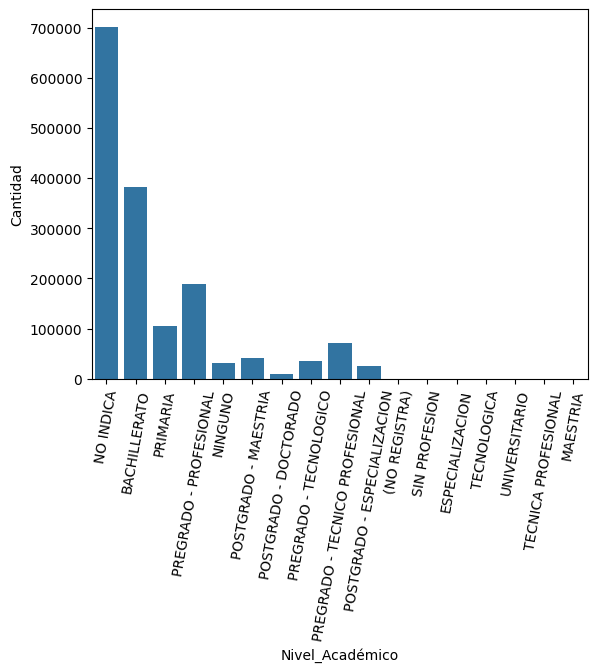

In [ ]:

#En el grafico podemos identificar que la mayoria de los colombianos que emigran a otros paises no centan con un nivel academico de estudio o simplemente cuenan con un nivel basico y secundario
sns.countplot(data=data_cleaning, x="Nivel_Académico")
plt.xticks(rotation=80)
plt.ylabel("Cantidad")
plt.show()

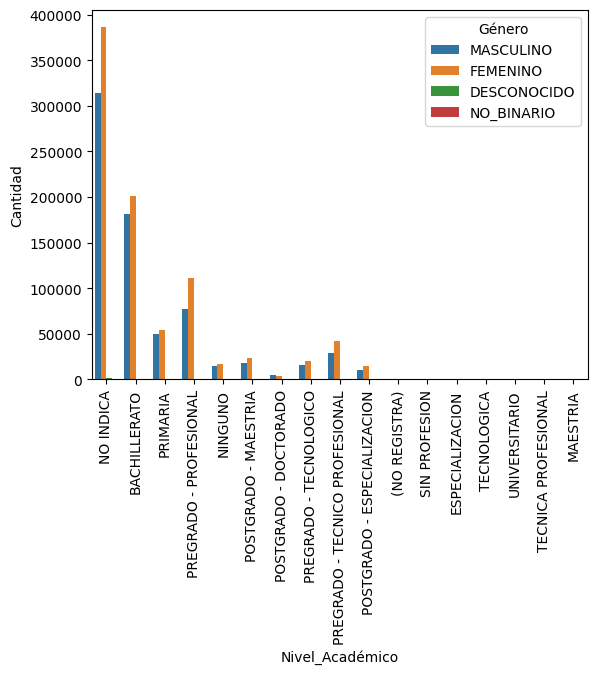

In [ ]:
#En el grafico podemos identificar que:
# La mayoria de mujeres no registra un nivel academico o registra un nivel de bachillerato bajo
data_cleaning["Nivel_Académico"].value_counts().index
filtered_data = data_cleaning[
        (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Nivel_Académico", hue="Género")  # "hue" separa por género
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Se realiza la identificacion del estado civil de los colombianos 
data_cleaning. Estado_civil.value_counts().sort_index()

Estado_civil
CASADO                  496753
DESCONOCIDO              88005
DIVORCIADO               74989
SEPARADO_MATRIMONIO       3270
SEPARADO_UNION_LIBRE      1471
SOLTERO                 782186
UNION_LIBRE             121014
VIUDO                    25928
Name: count, dtype: int64

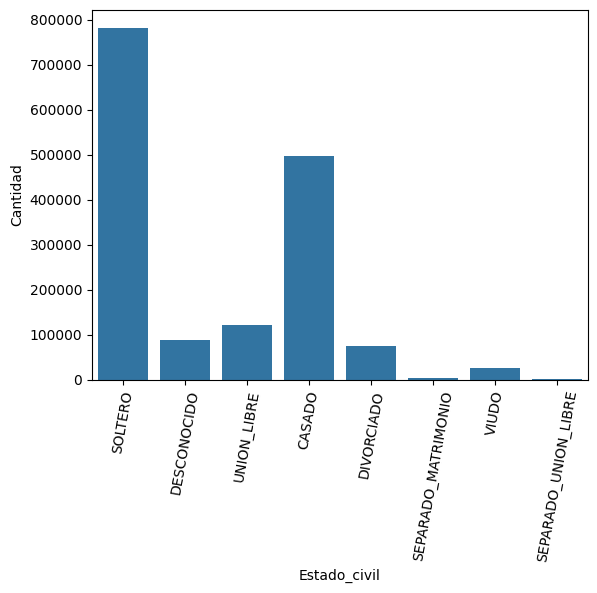

In [ ]:
# Se evidencia a traves del grafico de barrsa que la mayoria de los colombianos que emigran se encuentran en un estado civil de soltero
#Posteriormente se evidencia que el segundo estado civil que se registra es el de casado
sns.countplot(data=data_cleaning, x="Estado_civil")
plt.xticks(rotation=80)
plt.ylabel("Cantidad")
plt.show()

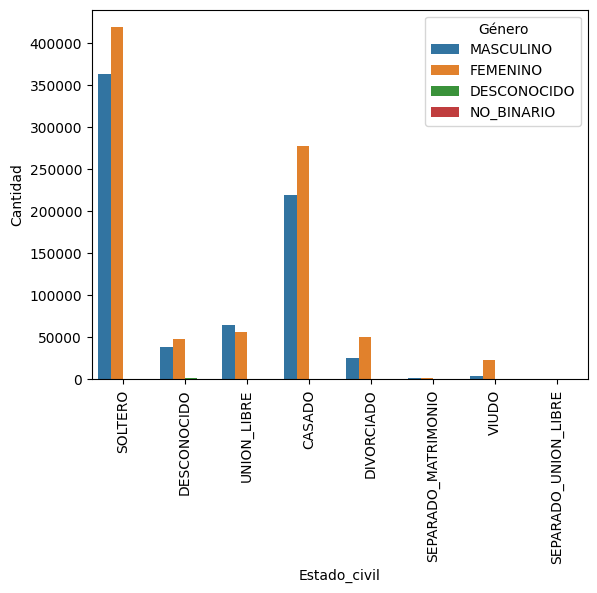

In [ ]:
# Se realiza el filtro por genero y se identifica que:
#Las mujeres que mas emigran hacia otros paises se encuentran en un estado civil de solteras y casadas 
# Los hombres que mas emigran hacia otros paises se encuentran en un estado civil de solteros y casados

data_cleaning["Estado_civil"].value_counts().index
filtered_data = data_cleaning[
        (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Estado_civil", hue="Género")  # "hue" separa por género
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
data_cleaning. Género.value_counts().sort_index()

Género
DESCONOCIDO      2533
FEMENINO       874231
MASCULINO      716842
NO_BINARIO         10
Name: count, dtype: int64

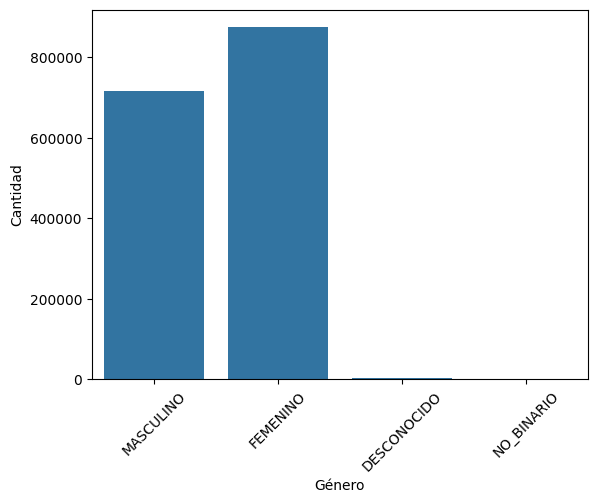

In [ ]:
# Se realiza grafico de barras con respecto al genero y se evidencia que:
# las muejres son las que mas viajan hacia otros paises, seguido del genero masculino y genero desconocido
sns.countplot(data=data_cleaning, x="Género")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

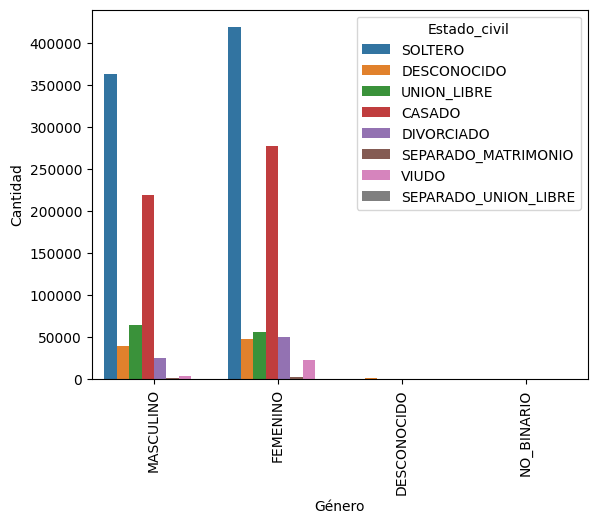

In [ ]:
# Se realiza la validacion por genero identificando que el genero femenino no indica un nivel academico y que muy pocos cuentan con el bachilleraro y un pregrado
sns.countplot(data=filtered_data, x="Género", hue="Estado_civil")  # "hue" separa por estado civil
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()


In [ ]:

#Se el tipo de etnia o caracteristica cultural de los colombianos que emigran hacia otros paises

Etnia_de_la_persona
AFRODESCENDIENTE                          22799
GITANO                                      447
INDIGENA                                   4050
NINGUNA                                  696400
OTRO                                     818974
PALENQUERO DE SAN BASILIO                   154
RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES       469
SIN ETNIA REGISTRADA                      50323
Name: count, dtype: int64

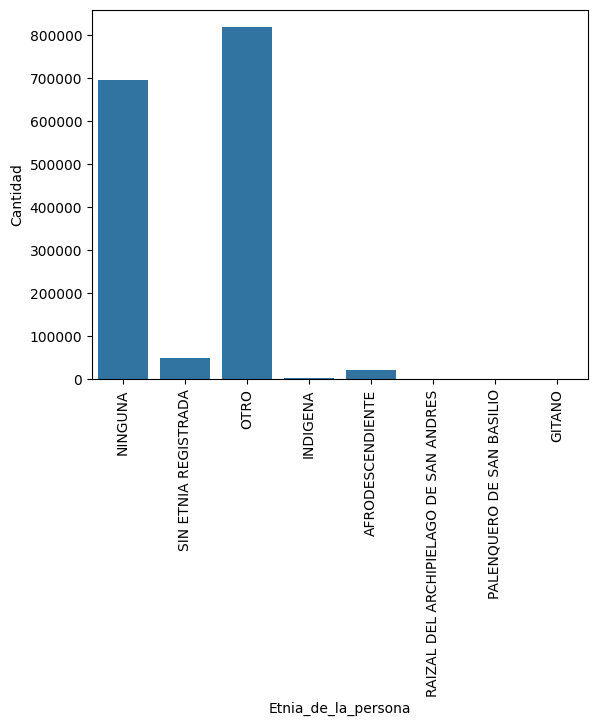

In [ ]:

# Dentro del grafico se identifica que los colombianos registraron no tener ninguna etnia registrada
sns.countplot(data=data_cleaning, x="Etnia_de_la_persona")
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

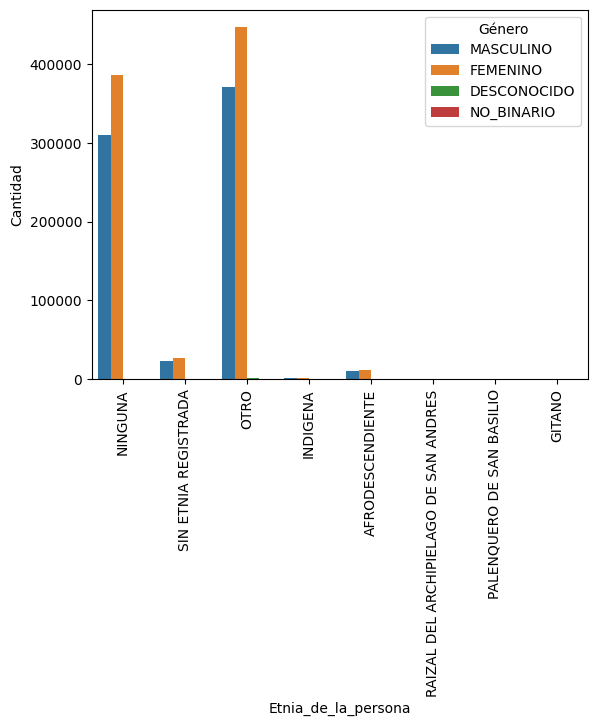

In [ ]:
# Dentro del filttro por genero podemos identificar que la mayoria de las personas que no registran etinias u otros son del genero femenino seguido del genero masculino 
data_cleaning["Etnia_de_la_persona"].value_counts().index
filtered_data = data_cleaning[
        (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Etnia_de_la_persona", hue="Género")  # "hue" separa por género
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Se identifica el lugar de nacimiento 
data_cleaning.Ciudad_de_Nacimiento.value_counts().sort_index()

Ciudad_de_Nacimiento
(NO REGISTRA)                          52670
AFGANISTAN/KHOWST/A'IKHEL                  1
ALBANIA/BERAT/BOGDAN I POSHTEM             1
ALBANIA/FIER/A?JECAR                       1
ALBANIA/LEZHE/KALIVAC                      1
                                       ...  
VIETNAM/KHANH HOA/KHANH HOA                1
YUGOSLAVIA/BELGRADO/NOVI SAD               1
ZAMBIA/NORTH-WESTERN/MARANDIKA             1
ZIMBABWE/MASHONALAND EAST/HARARE           1
ZIMBABWE/Provincia de Harare/HARARE        1
Name: count, Length: 12325, dtype: int64

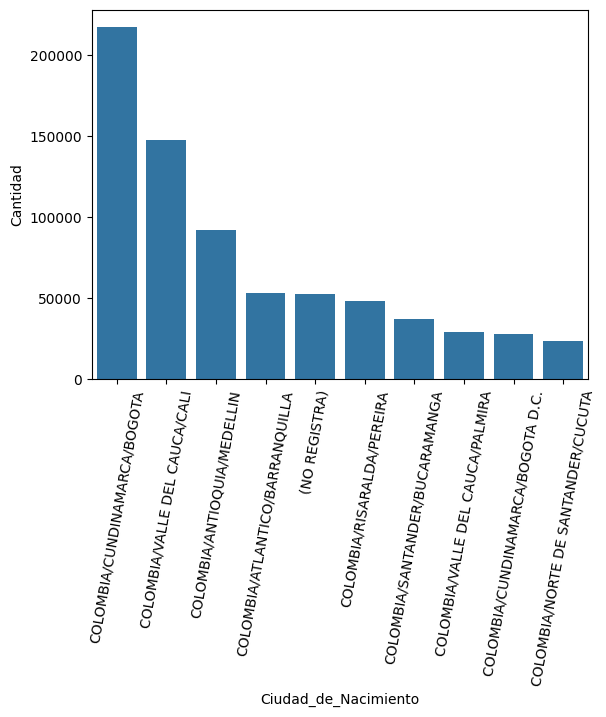

In [ ]:
# Se realiza el top 10 de las ciudades de nacimiento y se identifica la mayoria de los colombianos nacieron  en la ciudad de Bogota,Cali y Medellin
top_10 = data_cleaning["Ciudad_de_Nacimiento"].value_counts().nlargest(10).index
filtered_data = data_cleaning[data_cleaning["Ciudad_de_Nacimiento"].isin(top_10)]
sns.countplot(data=filtered_data, x="Ciudad_de_Nacimiento", order=top_10)
plt.xticks(rotation=80)
plt.ylabel("Cantidad")
plt.show()

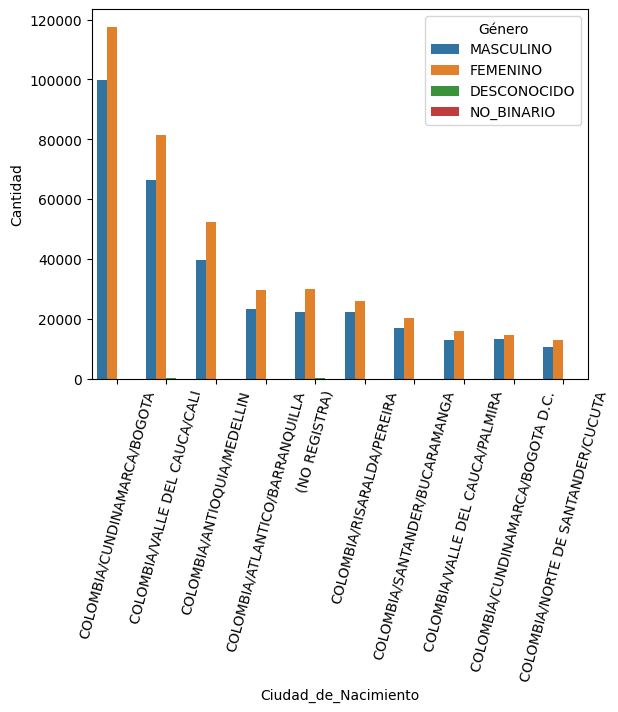

In [ ]:
# Se realiza filtro por el tipo de genero y se determina que las mujeres lideran la tasa de nacimiento de las ciudades de Bogota, cali y medellin

top_10 = data_cleaning["Ciudad_de_Nacimiento"].value_counts().nlargest(10).index
filtered_data = data_cleaning[
    (data_cleaning["Ciudad_de_Nacimiento"].isin(top_10)) &
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))
]
 
sns.countplot(data=filtered_data, x="Ciudad_de_Nacimiento", order=top_10, hue="Género")  # "hue" separa por género
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.show()

In [65]:
#Se evalua la estatura registrada de los colombianos que emigran hacia otros paises
data_cleaning.Estatura.value_counts().sort_index()

Estatura
-1         1279432
 0             185
 1              44
 2               2
 4               1
            ...   
 665             1
 860             1
 17070           1
 153153          1
 163163          1
Name: count, Length: 211, dtype: int64

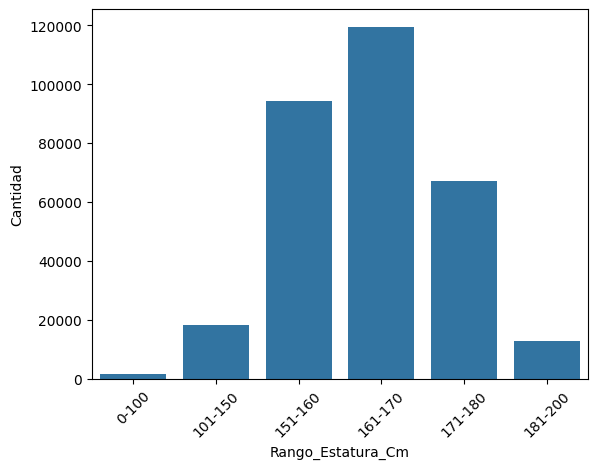

In [ ]:
# Se establece los rangos de estatura para mejor comprension de la grafica y se identifica que el rango de estatura de los colombianos que emigran se encuentran entre 151-160 y 161 a 170
bins = [0, 100, 150, 160, 170, 180, 200]
labels = ["0-100", "101-150", "151-160", "161-170", "171-180", "181-200"]
 
data_cleaning["Rango_Estatura_Cm"] = pd.cut(data_cleaning["Estatura"], bins=bins, labels=labels)
sns.countplot(data=data_cleaning, x="Rango_Estatura_Cm", order=labels)
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

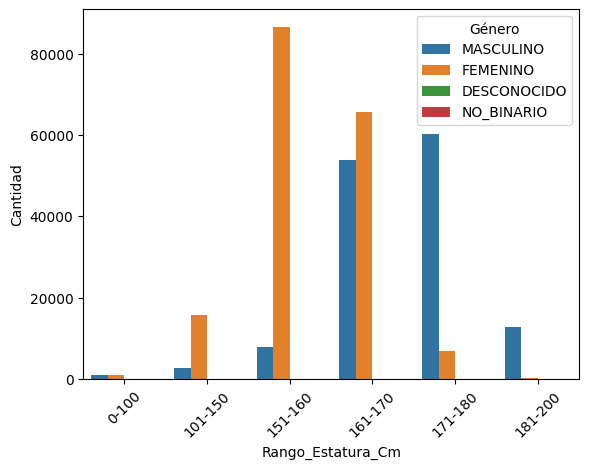

In [ ]:
# Se realiza filtro por genero y se identifica que:
#Se valida que el rango de estatura en que viajaba mas las mujeres esta entre 151-160 y los hombres entre el 171-180
bins = [0, 100, 150, 160, 170, 180, 200]
labels = ["0-100", "101-150", "151-160", "161-170", "171-180", "181-200"]
 
data_cleaning["Rango_Estatura_Cm"] = pd.cut(data_cleaning["Estatura"], bins=bins, labels=labels)
filtered_data = data_cleaning[
    (data_cleaning["Género"].isin(["FEMENINO", "MASCULINO","DESCONOCIDO","NO_BINARIO" ]))]
 
sns.countplot(data=filtered_data, x="Rango_Estatura_Cm", order=labels, hue="Género")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()